In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

data = pd.read_csv("/content/hotel_bookings.csv")

In [ ]:
#1 data.describe()
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,29264.000000,23221.000000,2351.000000,29264.000000,29264.000000,29264.000000,29264.000000
mean,0.379716,98.071453,2015.878144,28.171918,15.723141,1.199289,3.159069,1.875239,0.132381,0.013464,0.048900,0.139079,0.185142,0.260867,214.380345,224.101234,0.597048,95.116157,0.122403,0.560689
std,0.485324,99.541516,0.656899,13.364027,8.854226,1.144869,2.448000,0.768567,0.455187,0.116724,0.215662,1.560389,1.154339,0.691890,84.038022,114.949902,7.910657,60.679642,0.335179,0.781501
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,13.000000,2015.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,135.000000,0.000000,50.400000,0.000000,0.000000
50%,0.000000,65.000000,2016.000000,30.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,76.000000,0.000000,0.000000
75%,1.000000,163.000000,2016.000000,39.000000,23.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,242.000000,291.500000,0.000000,126.600000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,531.000000,543.000000,150.000000,508.000000,8.000000,5.000000


In [ ]:
#2 Mean of not NULL values
data.mean(axis = 0, skipna = True)

<ipython-input-27-c2b43ea59661>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean(axis = 0, skipna = True)


is_canceled                          0.379716
lead_time                           98.071453
arrival_date_year                 2015.878144
arrival_date_week_number            28.171918
arrival_date_day_of_month           15.723141
stays_in_weekend_nights              1.199289
stays_in_week_nights                 3.159069
adults                               1.875239
children                             0.132381
babies                               0.013464
is_repeated_guest                    0.048900
previous_cancellations               0.139079
previous_bookings_not_canceled       0.185142
booking_changes                      0.260867
agent                              214.380345
company                            224.101234
days_in_waiting_list                 0.597048
adr                                 95.116157
required_car_parking_spaces          0.122403
total_of_special_requests            0.560689
dtype: float64

<ipython-input-14-beb99a16e785>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = data.corr(method='pearson'))


<Axes: >

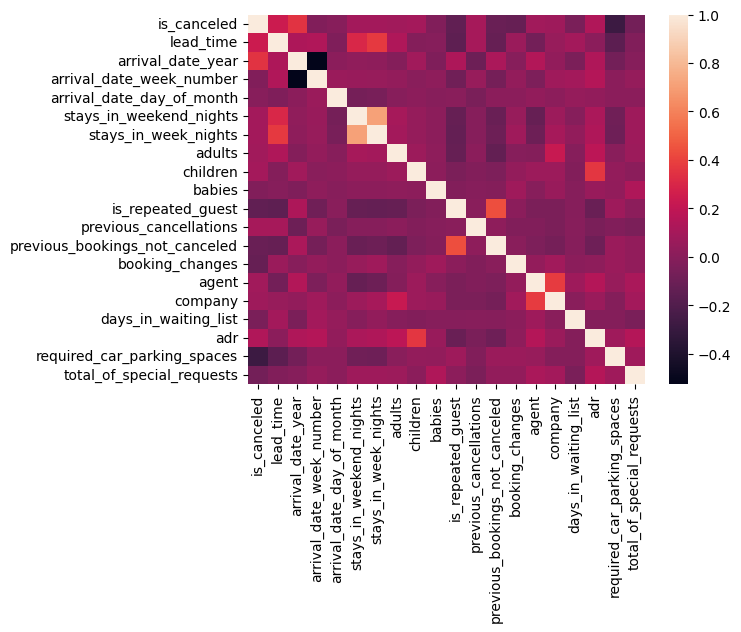

In [ ]:
#3 data.corr()
import seaborn as sns
# data.corr(method='pearson')
sns.heatmap(data = data.corr(method='pearson'))

In [ ]:
#4 count the sum of NULL values in a data set
print(data.isnull().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             461
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              6043
company                           26913


In [ ]:
#5 replace the NULL values by a NOT NULL value (1000)
mean = data.mean(axis = 0, skipna = True)
for col in data.select_dtypes(include=np.number).columns:
  if (data[col].isnull().sum()/len(data[col]) * 100) > 80:
    data.drop(col, axis=1, inplace = True)
  else:
    data[col].fillna(mean[col], inplace = True)


print(data.isnull().sum())
print(data['agent'])

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           461
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

<ipython-input-67-081e5bf51d9e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = data.mean(axis = 0, skipna = True)
